<a href="https://colab.research.google.com/github/vasishtaa08/KNN/blob/main/KNN_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# IMPORTING DATASET AND UNDERSTANDING IT'S DISTRIBUTION

In [ ]:
file_path = '/content/BTM_hourly.csv'
df = pd.read_csv(file_path)
df=df.apply(pd.to_numeric,errors='coerce')

In [ ]:
df.describe

<bound method NDFrame.describe of        PM2.5   PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0      26.16  51.35  12.02  15.63  36.59  11.20  14.36  0.74  27.03     0.41   
1      28.46  56.15  12.37  15.70  35.90  11.19  13.82  0.74  27.23     0.43   
2      23.87  46.53  11.68  16.48  36.20  11.37  13.56  0.74  27.98     0.41   
3      26.49  52.02  12.07  15.87  37.06  11.33  12.32  0.74  27.30     0.41   
4      24.66  48.19  11.80  16.07  35.90  11.57  12.73  0.74  27.34     0.41   
...      ...    ...    ...    ...    ...    ...    ...   ...    ...      ...   
10700  -0.12    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN      NaN   
10701  -0.11    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN      NaN   
10702  -0.11    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN      NaN   
10703  -0.11    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN      NaN   
10704  -0.11    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN      NaN   

     

In [ ]:
df.shape

(10705, 20)

# Replace 'None' values with actual NaN values for easier handling

In [ ]:
df.replace('None', pd.NA, inplace=True)

# Separating features and target variable

In [ ]:
X = df.drop('PM2.5', axis=1)  # Features
y = df['PM2.5']  # Target variable

# Creating SimpleImputer instance to impute missing values with the mean

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Creating SimpleImputer instance to impute missing values with the mean for y

In [ ]:
imputer_y = SimpleImputer(strategy='mean')

# Impute missing values in the features


In [ ]:
X_imputed = imputer.fit_transform(X)

# Reshape y to a 2D array


In [ ]:
y = y.values.reshape(-1, 1)
y_imputed = imputer_y.fit_transform(y)


# Splitting the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

#Defining knn regressor model

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Model testing

In [ ]:
y_pred = knn_regressor.predict(X_test)

#Model evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 37.30028594920226


In [ ]:
from sklearn.metrics import r2_score

# Assuming 'y_test' and 'y_pred' are your true and predicted values
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.8878340178188752


In [ ]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 6.107396003961284


         Actual  Predicted
0     16.860000  14.886667
1     24.720000  22.533333
2     11.862167  13.868112
3     11.862167  -0.130000
4     27.060000  19.750722
...         ...        ...
2136  19.390000  19.310000
2137  -0.090000  -0.130000
2138  -0.190000  -0.130000
2139  47.840000  43.966667
2140   0.010000  -0.130000

[2141 rows x 2 columns]


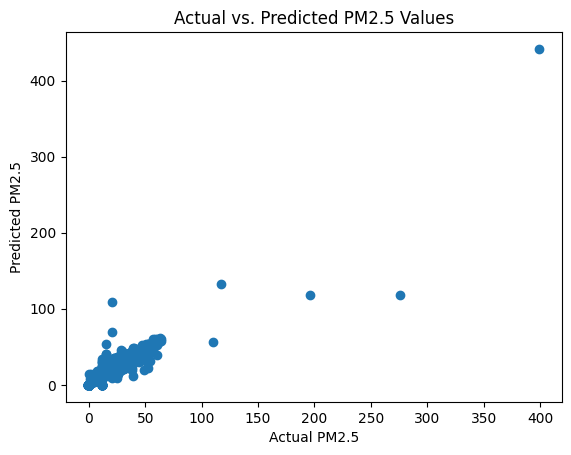

In [ ]:
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Print the DataFrame
print(comparison_df)

# Plot a scatter plot to visualize the comparison
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 Values')
plt.show()